In [27]:
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedLineDocument
from gensim.models.doc2vec import Doc2Vec
from gensim import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
class File2DocSpace(Doc2Vec):
    
    def __init__(self, file_name, epochs=10, size=20,
                 window=3,
                 min_count=2, workers=1,
                 alpha=0.5, min_alpha=0.025, batch_words=30):
    
        self.file_name = file_name
        self.D, self.y = self.file_name
        super(File2DocSpace, self).__init__(self.D, size=20,
                                            window=3,
                                            min_count=2, workers=1,alpha=0.5,
                                            min_alpha=0.025, batch_words=30)
        self.train()
        self.X = np.asarray(self.docvecs)

    def load_data(self):
        with open(self.file_name) as f:
            lines = f.readlines()

        labels = list()
        all_dat = list()
        for i, l in enumerate(lines):

            labels.append(int(l[0]))

            l = gensim.utils.any2unicode(l)
            all_dat.append(LabeledSentence(l.split("\t")[-1], [i]))

    return all_dat, np.asarray(labels)

    def train(self):
        for epoch in range(self.epochs):
            print "epoch: ", epoch
            self.train(all_dat)
            self.alpha -= 0.002  # decrease the learning rate
            self.min_alpha = model.alpha  # fix the learning rate, no decay

all_dat, labels = load_data("training_data.txt")

%whos

Variable             Type        Data/Info
------------------------------------------
Doc2Vec              type        <class 'gensim.models.doc2vec.Doc2Vec'>
LabeledDocs          type        <class '__main__.LabeledDocs'>
LabeledSentence      type        <class 'gensim.models.doc2vec.LabeledSentence'>
TaggedLineDocument   type        <class 'gensim.models.doc<...>2vec.TaggedLineDocument'>
all_dat              list        n=24544
chain                type        <type 'itertools.chain'>
gensim               module      <module 'gensim' from '/u<...>ges/gensim/__init__.pyc'>
human                tuple       n=2
labels               list        n=24544
load_data            function    <function load_data at 0x7fa249402e60>
machine              list        n=0
np                   module      <module 'numpy' from '/us<...>ages/numpy/__init__.pyc'>
partition            tuple       n=2
utils                module      <module 'gensim.utils' fr<...>ckages/gensim/utils.pyc'>


In [21]:
model = Doc2Vec(all_dat, size=20,
                window=3,
                min_count=2,
                workers=1, alpha=0.5, min_alpha=0.025, batch_words=30)

In [22]:
for epoch in range(10):
    model.train(all_dat)
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay


In [24]:
model.docvecs[0]

array([ -4.16080618,   7.86999989,  -4.46199608,   7.13694048,
         3.10698271,  -2.88840127,   1.74471748,  -0.97182751,
         5.87341976,   6.100739  ,   1.21941137,  -3.40129614,
         1.46895027,   3.24989533,  -5.19673252,  -3.19910502,
        10.21798515,   0.87634373,  -5.62255907,  -7.26466751], dtype=float32)

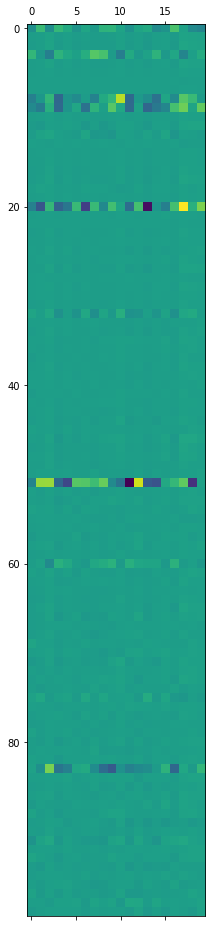

In [32]:
plt.matshow(np.asarray(model.docvecs)[0:100, 0:20])

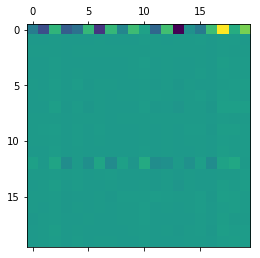

In [31]:
plt.matshow(np.asarray(model.docvecs)[20:40, 0:20])